In [90]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [91]:
df = pd.read_excel("data.xls")


In [92]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [93]:
df.describe



<bound method NDFrame.describe of                     time  pm25
0    2019-07-01 18:30:26    19
1    2019-07-01 18:31:26    15
2    2019-07-01 18:32:26    13
3    2019-07-01 18:33:27    15
4    2019-07-01 18:34:27    15
...                  ...   ...
8197 2019-07-07 11:52:42    14
8198 2019-07-07 11:53:42    14
8199 2019-07-07 11:54:42    15
8200 2019-07-07 11:56:25    13
8201 2019-07-07 11:56:42    13

[8202 rows x 2 columns]>

In [94]:
#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index
df

,pm25
time,
2019-07-01 18:30:26,19
2019-07-01 18:31:26,15
2019-07-01 18:32:26,13
2019-07-01 18:33:27,15
2019-07-01 18:34:27,15
2019-07-01 18:35:27,13
2019-07-01 18:36:27,12
2019-07-01 18:37:27,11
2019-07-01 18:38:27,12


In [105]:
train=df[0:1258] 
test=df[1258:1500]

test

,pm25
time,
2019-07-02 15:32:40,29
2019-07-02 15:33:40,22
2019-07-02 15:34:40,21
2019-07-02 15:35:40,29
2019-07-02 15:36:40,46
2019-07-02 15:37:40,39
2019-07-02 15:38:40,38
2019-07-02 15:39:40,35
2019-07-02 15:40:40,31


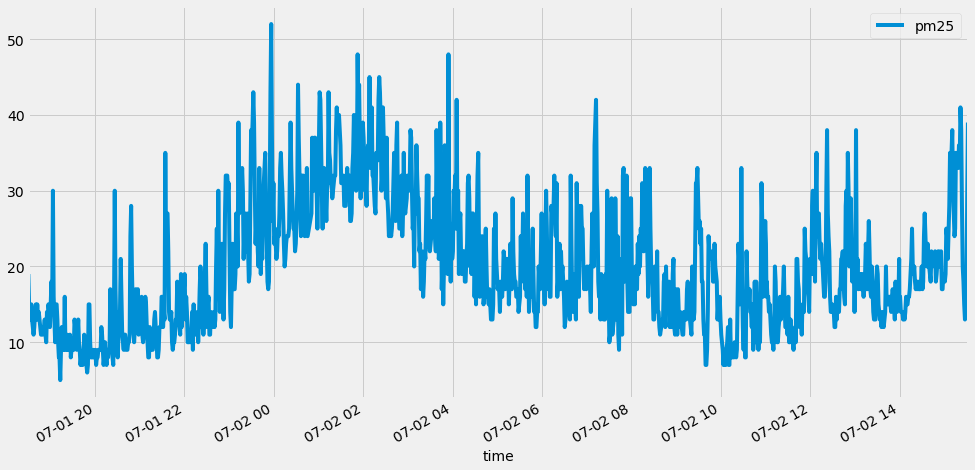

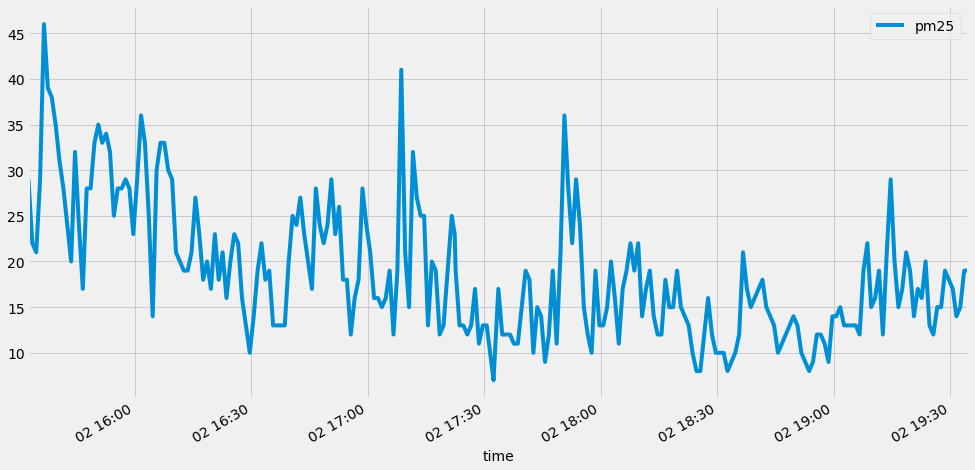

In [106]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()


In [102]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



training_set = train.iloc[:].values
training_set

array([[19],
       [15],
       [13],
       ...,
       [15],
       [14],
       [ 9]], dtype=int64)

In [104]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units =  150, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





Using TensorFlow backend.
W0723 17:19:20.280325  8224 deprecation_wrapper.py:119] From C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 17:19:20.299233  8224 deprecation_wrapper.py:119] From C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 17:19:20.300299  8224 deprecation_wrapper.py:119] From C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 17:19:20.515205  8224 deprecation_wrapper.py:119] From C:\Users\t-bhchha\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is depreca

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0270
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0177
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0166
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0169
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0170
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0164
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0168A: 0s - loss: 
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0160
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0167
Epoch 10/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0145
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0141
Epoch 12/100
1198/1198 [==============================] - 7s

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0108
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0109
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0107
Epoch 99/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0104
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0106A: 


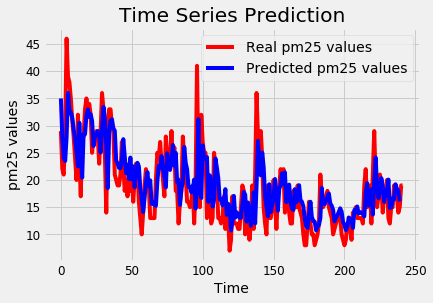

In [112]:

real_stock_price = test.iloc[:].values


dataset_total = pd.concat((train['pm25'], test['pm25']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real pm25 values')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('pm25 values')
plt.legend()
plt.show()